# 使用逻辑回归解决多分类问题

# OvR and OvO

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1, multi_class="multinomial", solver="newton-cg")
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(x_test, y_test)

0.7894736842105263

In [5]:
# 边界绘制函数

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


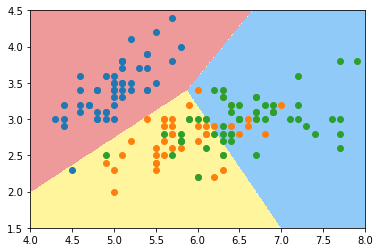

In [6]:
plot_decision_boundary(log_reg, axis=[4,8,1.5,4.5])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])

plt.show()

## OVR 和 OVO 直接使用

In [13]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 666)
log_reg_two = LogisticRegression(n_jobs=-1)

In [14]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg_two, n_jobs=-1)
ovr.fit(x_train, y_train)
ovr_score = ovr.score(x_test, y_test)
ovr_score

0.9473684210526315

In [15]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg_two, n_jobs=-1)
ovo.fit(x_train, y_train)
ovo_score = ovo.score(x_test, y_test)
ovo_score

1.0

## 总结：

* 1、sklearn中的logistic regression已经包含了ovr和ovo的功能
* 2、ovo的计算速度不如ovr，但效果好于ovr